In [44]:
import numpy as np
import sklearn
sklearn.__version__
from sklearn.datasets import load_iris,load_diabetes
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression


## LinearRegression

In [14]:
diabetes = load_diabetes()
print(diabetes.keys())
X = diabetes['data']
y = diabetes['target']
print(X.shape,y.shape)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10) (442,)


In [147]:
np.random.seed(0)
W = np.random.normal(size=10)
#W = np.array([0]*10)
#W = np.array([1]*10)
W
w0 = 0 

In [105]:
def f(X,w,w0=0):
    return (X * w).sum(axis=1) + w0

array([14])

In [149]:
#1. нужна функция потерь, пусть это будет MSE (оказывается L2 норма это часть MSE, если L2 поделить на количество)
def loss(f,X,W,y,w0):
    l2_norm = ((y - f(X,W,w0))**2).sum()
    mse = l2_norm/len(X)
    return mse

loss(f,X,W,y,w0)


np.float64(29061.366683608125)

In [151]:
mean_squared_error(y,f(X,W,w0))

np.float64(29061.366683608125)

In [152]:
def fit(X,y):
    s1 = X.T@y
    s2 = X.T@X
    s3 = np.linalg.inv(s2)
    #print(s1.shape,s2.shape,s3.shape)
    s4 = s3@s1
    #print(s4.shape)
    return s4

In [153]:
w_new = fit(X,y)
w_new

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

np.float64(152.13348416289597)

In [159]:
y_pred = f(X,w_new,w0)
w0 = y.mean() - y_pred.mean()

In [160]:
loss(f,X,w_new,y,w0)

np.float64(2859.6963475867506)

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [134]:
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [136]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 10,
 'coef_': array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]),
 'rank_': 10,
 'singular_': array([2.00604356, 1.22160537, 1.09816495, 0.97748473, 0.81374529,
        0.77634855, 0.73250642, 0.65854539, 0.27985715, 0.09252421]),
 'intercept_': np.float64(152.13348416289597)}

In [130]:
y_pred=model.predict(X)
mean_squared_error(y,y_pred)

np.float64(2859.69634758675)

## LogisticRegression

In [10]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
sklearn.__version__
from sklearn.datasets import load_iris,load_diabetes
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LogisticRegression


In [163]:
LogisticRegression??

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(LinearClassifierMixin, SparseCoefMixin, BaseEstimator):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    th

In [9]:
#data = load_iris()
X = data['data']
y = data['target']
X.shape, y.shape

((150, 4), (150,))

In [113]:
X[0:100]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [114]:
y_part = y[0:100]
X_part = X[0:100]
X_part.shape, y_part.shape

((100, 4), (100,))

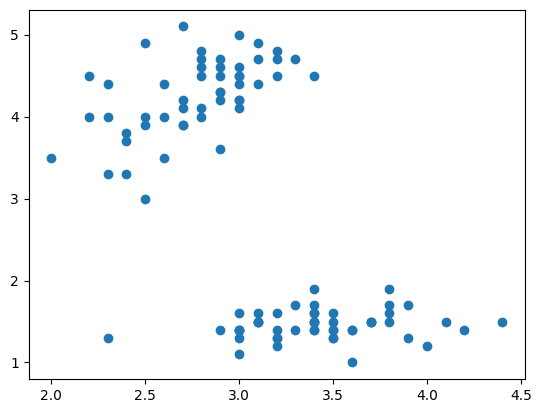

In [123]:
X_01 = X_part[:,1:3]
#X_01.shape
plt.scatter([x for x,y in X_01],[y for x,y in X_01])

In [34]:
# y_part = np.array([x if x == 1 else -1 for x in y_part])
y_part

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
math.log?

Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method

In [42]:
p = 2
p/(1-p)

-2.0

In [65]:
import math
def logit(p):
    r = float(p)/(1.0-float(p))
    #print('\t',r)
    return math.log(r)
print(logit(0.9999999999999999))
print(logit(0.9))

36.7368005696771
2.1972245773362196


<function math.exp(x, /)>

In [82]:
def sigm(x):
    return 1/(1+math.exp(-x))

sigm(1)

0.7310585786300049

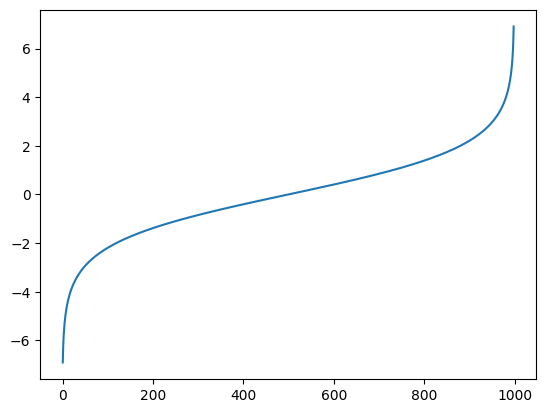

In [77]:
plt.plot([logit(p) for p in np.arange(0.001,1,0.001)])

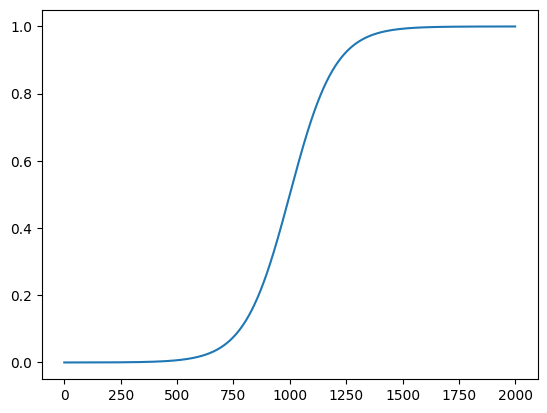

In [97]:
plt.plot([sigm(p) for p in np.arange(-10,10,0.01)])

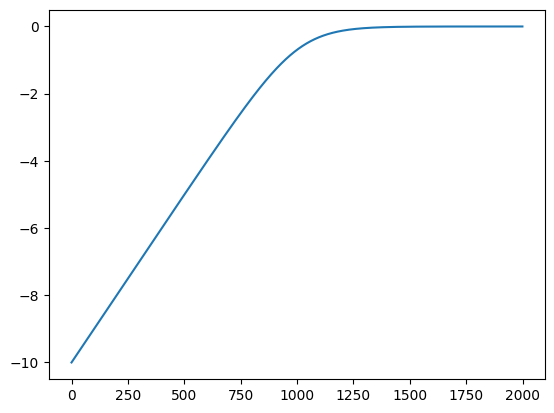

In [98]:
plt.plot([math.log(sigm(p)) for p in np.arange(-10,10,0.01)])

[[np.float64(5.1), np.float64(3.5)],
 [np.float64(4.9), np.float64(3.0)],
 [np.float64(4.7), np.float64(3.2)],
 [np.float64(4.6), np.float64(3.1)],
 [np.float64(5.0), np.float64(3.6)],
 [np.float64(5.4), np.float64(3.9)],
 [np.float64(4.6), np.float64(3.4)],
 [np.float64(5.0), np.float64(3.4)],
 [np.float64(4.4), np.float64(2.9)],
 [np.float64(4.9), np.float64(3.1)],
 [np.float64(5.4), np.float64(3.7)],
 [np.float64(4.8), np.float64(3.4)],
 [np.float64(4.8), np.float64(3.0)],
 [np.float64(4.3), np.float64(3.0)],
 [np.float64(5.8), np.float64(4.0)],
 [np.float64(5.7), np.float64(4.4)],
 [np.float64(5.4), np.float64(3.9)],
 [np.float64(5.1), np.float64(3.5)],
 [np.float64(5.7), np.float64(3.8)],
 [np.float64(5.1), np.float64(3.8)],
 [np.float64(5.4), np.float64(3.4)],
 [np.float64(5.1), np.float64(3.7)],
 [np.float64(4.6), np.float64(3.6)],
 [np.float64(5.1), np.float64(3.3)],
 [np.float64(4.8), np.float64(3.4)],
 [np.float64(5.0), np.float64(3.0)],
 [np.float64(5.0), np.float64(3.4)],
 

In [108]:
np.random.seed(0)
W = np.random.normal(size=2)
#W = np.array([0]*10)
#W = np.array([1]*10)
w0 = 0 

In [111]:
X_01.shape

AttributeError: 'list' object has no attribute 'shape'

In [165]:
from sklearn.datasets import make_classification
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [174]:
import numpy as np

class LogisticRegressionML:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Инициализация весов и смещения
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Градиентный спуск
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Вычисление градиентов
            dw = np.dot(X.T, (y_predicted - y))
            db = np.sum(y_predicted - y)
            
            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Можно вывести значение функции потерь для отслеживания
            loss = - np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            if _ % 100 == 0:
                print(f'Loss after iteration {_}: {loss}')

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Пример использования
#if __name__ == "__main__":
# Создаем примерные данные для обучения
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, random_state=42)
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
model = LogisticRegressionML(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Делаем предсказания
predictions = model.predict(X_test)

# Оценка
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Loss after iteration 0: 55.451774444795625
Loss after iteration 100: 0.14826720519719427
Loss after iteration 200: 0.09010562568253011
Loss after iteration 300: 0.06530774758182664
Loss after iteration 400: 0.05137601644738421
Loss after iteration 500: 0.042407966232855865
Loss after iteration 600: 0.03613717686099491
Loss after iteration 700: 0.0314996293841812
Loss after iteration 800: 0.0279277252803189
Loss after iteration 900: 0.025090360291102544
Accuracy: 100.00%


In [137]:

def f(X,w,w0=0):
    return (X * w).sum(axis=1) + w0

def sigm(x):
    return 1/(1+math.exp(-x))

##---------------------------------------------------------------------------------------------------------
def log_likelihood(self, params, X, y):
        weights = params[:-1]  # последние параметры - это смещение
        bias = params[-1]
        linear_model = np.dot(X, weights) + bias
        y_predicted = self.sigmoid(linear_model)
        # Используем функцию логарифмического правдоподобия
        return -np.sum(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
    
def fit(self, X, y):
    num_features = X.shape[1]
    # Инициализация весов и смещения
    initial_params = np.zeros(num_features + 1)
    
    # Минимизируем отрицательную функцию логарифмического правдоподобия
    result = minimize(self.log_likelihood, initial_params, args=(X, y), method='BFGS')
    self.weights = result.x[:-1]
    self.bias = result.x[-1]

def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_model)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_class)
##---------------------------------------------------------------------------------------------------------
    
    
def log_loss(w,X,y):
    '''
    w - вектор весов M
    X - матрица признаков (N,M)
    y - вектор значений M
    '''
    s = 0 #результатирующая сумма
    
    #assert len(W) == len(y) == X.shape[0]
    
    for i in range(len(y)):
        sigm_val = sigm(f([X[i]],w)[0])
        log1 = math.log(sigm_val)
        log2 = math.log(1 - sigm_val)
        
        part1 = (y[i] * log1)
        part2 = (1 - y[i]) * log2
        part3 = part1 + part2
        
        s += -part3
    return s

def log_loss_grad(w,X,y):
    '''
    w - вектор весов M
    X - матрица признаков (N,M)
    y - вектор значений M
    '''
    s = 0 #результатирующая сумма
    
    #assert len(W) == len(y) == X.shape[0]
    
    for i in range(len(y)):
        y_i = Y[i]
        X_i = X[i]
        sigm_val_i = sigm(f([X_i],w)[0])

    return s

#X_01[0]
log_loss(W,X_01,y_part)

    

np.float64(331.7804678290215)

In [162]:
y_part[0] * sigm(f([X_01[0]],W)[0])

np.float64(0.0)